In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Full_data.csv')
df.tail()
df.shape
df.size
df.count()

lat                   2280
lng                   2280
name                  2280
vicinity              2280
Type1                 2280
Type2                 2279
Type3                 1998
Type4                 1392
Type5                  401
Type6                  163
rating                2280
user_ratings_total    2280
price_level           2280
dtype: int64

<AxesSubplot:xlabel='user_ratings_total', ylabel='price_level'>

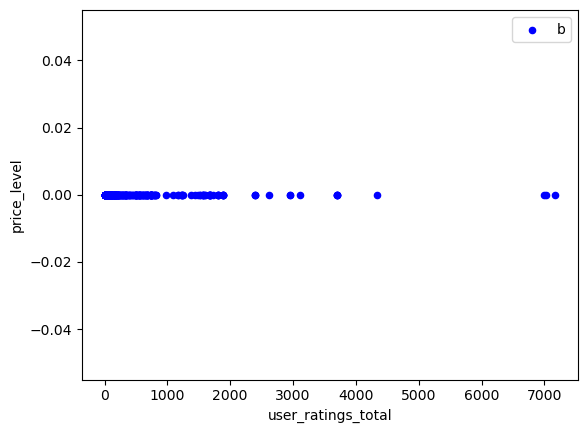

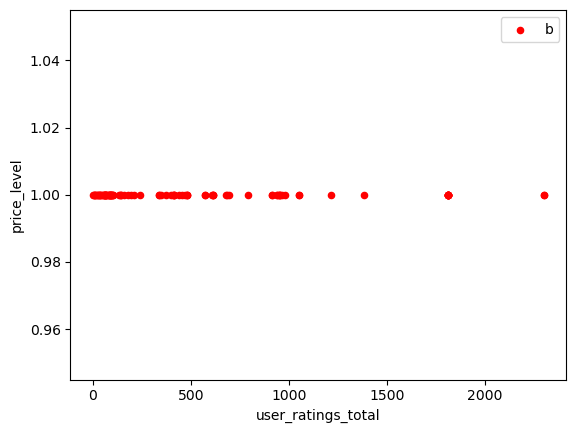

In [3]:
b_df=df[df['price_level']==0][0:1000]
m_df=df[df['price_level']==1][0:1000]

axes=b_df.plot(kind='scatter',x='user_ratings_total',y='price_level',color='blue',label='b')
m_df.plot(kind='scatter',x='user_ratings_total',y='price_level',color='red',label='b')


In [4]:
df.dtypes
df=df[pd.to_numeric(df['rating'],errors='coerce').notnull()]
df['rating']=df['rating'].astype('string')
df.dtypes


lat                   float64
lng                   float64
name                   object
vicinity               object
Type1                  object
Type2                  object
Type3                  object
Type4                  object
Type5                  object
Type6                  object
rating                 string
user_ratings_total      int64
price_level             int64
dtype: object

In [5]:
df.dtypes

lat                   float64
lng                   float64
name                   object
vicinity               object
Type1                  object
Type2                  object
Type3                  object
Type4                  object
Type5                  object
Type6                  object
rating                 string
user_ratings_total      int64
price_level             int64
dtype: object

In [6]:
df.columns

f_df=df[['lat','lng','vicinity','rating','Type1','Type2','Type3',
         'Type4','Type5','Type6','user_ratings_total','price_level']]

X=np.asarray(f_df)

y=np.asarray(df['name'])
y[0:5]

array(['West Haven', 'Hilton Garden Inn Milford',
       'Hyatt Place Milford / New Haven',
       'Courtyard by Marriott New Haven Orange/Milford',
       'Hampton Inn Milford'], dtype=object)

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,random_state=3)
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(228,)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np

In [9]:
df.head()

,lat,lng,name,vicinity,Type1,Type2,Type3,Type4,Type5,Type6,rating,user_ratings_total,price_level
0,41.270548,-72.946971,West Haven,West Haven,accounting,finance,point_of_interest,establishment,NaN,NaN,0.0,0,0
1,41.233086,-73.026043,Hilton Garden Inn Milford,"291 Old Gate Lane, Milford",accounting,finance,local_government_office,point_of_interest,establishment,NaN,4.0,813,0
2,41.231155,-73.029880,Hyatt Place Milford / New Haven,"190 Old Gate Lane, Milford",accounting,local_government_office,finance,point_of_interest,establishment,NaN,4.0,664,0
3,41.255831,-73.001768,Courtyard by Marriott New Haven Orange/Milford,"136 Marsh Hill Road, Orange",accounting,finance,point_of_interest,establishment,NaN,NaN,4.0,499,0
4,41.223208,-73.077087,Hampton Inn Milford,"129 Plains Road, Milford",accounting,finance,point_of_interest,establishment,NaN,NaN,3.8,824,0


In [10]:
df['price_level'].value_counts()

0    1908
2     228
1     100
3      36
4       8
Name: price_level, dtype: int64

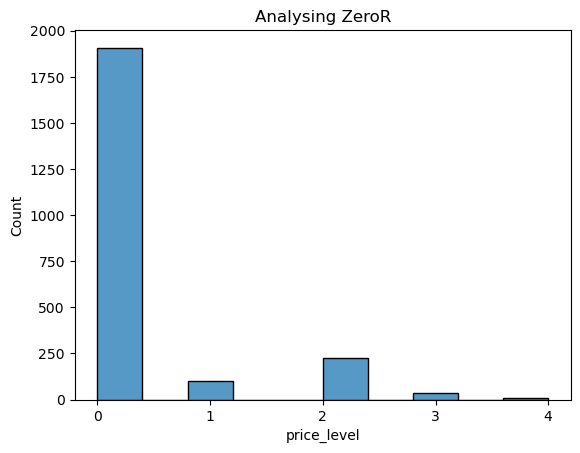

In [11]:
sns.histplot(df['price_level'],bins=10,kde=False)
plt.title("Analysing ZeroR")
plt.xticks([0,1,2,3,4])
plt.show()

In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Full_data.csv')

# Calculate the frequency of each class label in the training set
class_counts = df['price_level'].value_counts()

# Identify the most frequent class label
most_frequent_class = class_counts.index[0]

# Calculate the percentage of instances in the test set that belong to the most frequent class label
zeroR_accuracy = (df['price_level'] == most_frequent_class).mean() * 100

# Print the accuracy score
print(f"ZeroR accuracy: {zeroR_accuracy:.2f}%")


ZeroR accuracy: 83.68%


In [48]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Load the dataset
data = pd.read_csv("Full_data.csv")

# Preprocess the data
# ...
x = data[['lat', 'lng','rating', 'user_ratings_total']]

y = data['price_level']


import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score
df=pd.read_csv("Full_data.csv")
X, y = make_blobs(n_samples=2400, centers=4, random_state=42)
df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df['price_level'] = y

model = AgglomerativeClustering(n_clusters=4)
model.fit(df.iloc[:,:-1])
y_pred = model.labels_

accuracy_score(df.iloc[:,-1], y_pred)


0.24958333333333332

0.6848805816368916

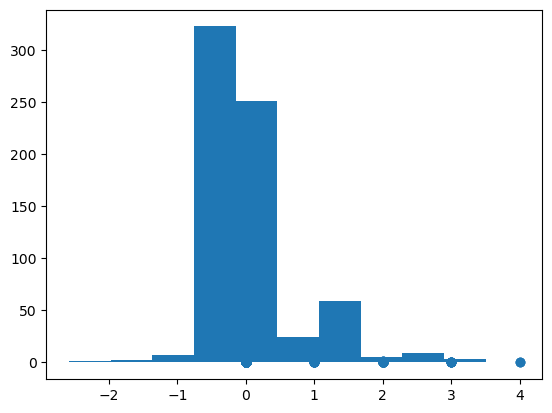

In [15]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline


# Load the dataset
data = pd.read_csv("Full_data.csv")

# Preprocess the data
# ...
x = data[['lat', 'lng','rating', 'user_ratings_total']]

y = data['price_level']


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])
predictions = model.predict(x_test)
plt.scatter(y_test, predictions)
plt.hist(y_test - predictions)
from sklearn import metrics

metrics.mean_absolute_error(y_test, predictions)

metrics.mean_squared_error(y_test, predictions)

np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
df=pd.read_csv("Full_data.csv")
df

,lat,lng,name,vicinity,Type1,Type2,Type3,Type4,Type5,Type6,rating,user_ratings_total,price_level
0,41.270548,-72.946971,West Haven,West Haven,accounting,finance,point_of_interest,establishment,NaN,NaN,0.0,0,0
1,41.233086,-73.026043,Hilton Garden Inn Milford,"291 Old Gate Lane, Milford",accounting,finance,local_government_office,point_of_interest,establishment,NaN,4.0,813,0
2,41.231155,-73.029880,Hyatt Place Milford / New Haven,"190 Old Gate Lane, Milford",accounting,local_government_office,finance,point_of_interest,establishment,NaN,4.0,664,0
3,41.255831,-73.001768,Courtyard by Marriott New Haven Orange/Milford,"136 Marsh Hill Road, Orange",accounting,finance,point_of_interest,establishment,NaN,NaN,4.0,499,0
4,41.223208,-73.077087,Hampton Inn Milford,"129 Plains Road, Milford",accounting,finance,point_of_interest,establishment,NaN,NaN,3.8,824,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,41.640696,-72.872586,T.J. Maxx,"875 Queen Street, Southington",university,point_of_interest,establishment,NaN,NaN,NaN,4.2,482,1
2276,41.665909,-72.922815,ALDI,"110 Middle Street, Bristol",university,point_of_interest,establishment,NaN,NaN,NaN,4.5,1050,1
2277,41.677566,-72.914300,Hartford County Tattoo,"253 West Washington Street, Bristol",university,point_of_interest,establishment,NaN,NaN,NaN,4.8,336,0
2278,41.622782,-72.873652,VIP Very Intimate Pleasures,"228 Queen Street, Southington",veterinary_care,point_of_interest,establishment,NaN,NaN,NaN,3.9,145,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2280 entries, 0 to 2279
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lat                 2280 non-null   float64
 1   lng                 2280 non-null   float64
 2   name                2280 non-null   object 
 3   vicinity            2280 non-null   object 
 4   Type1               2280 non-null   object 
 5   Type2               2279 non-null   object 
 6   Type3               1998 non-null   object 
 7   Type4               1392 non-null   object 
 8   Type5               401 non-null    object 
 9   Type6               163 non-null    object 
 10  rating              2280 non-null   float64
 11  user_ratings_total  2280 non-null   int64  
 12  price_level         2280 non-null   int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 231.7+ KB


In [18]:
df['price_level'].value_counts()

0    1908
2     228
1     100
3      36
4       8
Name: price_level, dtype: int64

In [19]:
x=['user_ratings_total','rating']
y=[0,1]
all_inputs=df[x]
all_classes=df['price_level']


In [20]:
x_train,x_test,y_train,y_test=train_test_split(all_inputs,all_classes,train_size=0.2,random_state=1)

In [21]:
clf=DecisionTreeClassifier(random_state=0)

In [22]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [23]:
score=clf.score(x_test,y_test)

In [24]:
print(score)

0.8432017543859649


In [25]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pydotplus



In [26]:
pip install graphviz


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [28]:

X, y = make_blobs(n_samples=2000, centers=4, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
classifier = svm.SVC(kernel='linear', C=1.0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.85      0.86       143
           1       0.97      0.93      0.95       147
           2       0.86      0.92      0.89       147
           3       0.99      0.99      0.99       163

    accuracy                           0.93       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.93      0.93      0.93       600



Accuracy: 0.9013157894736842


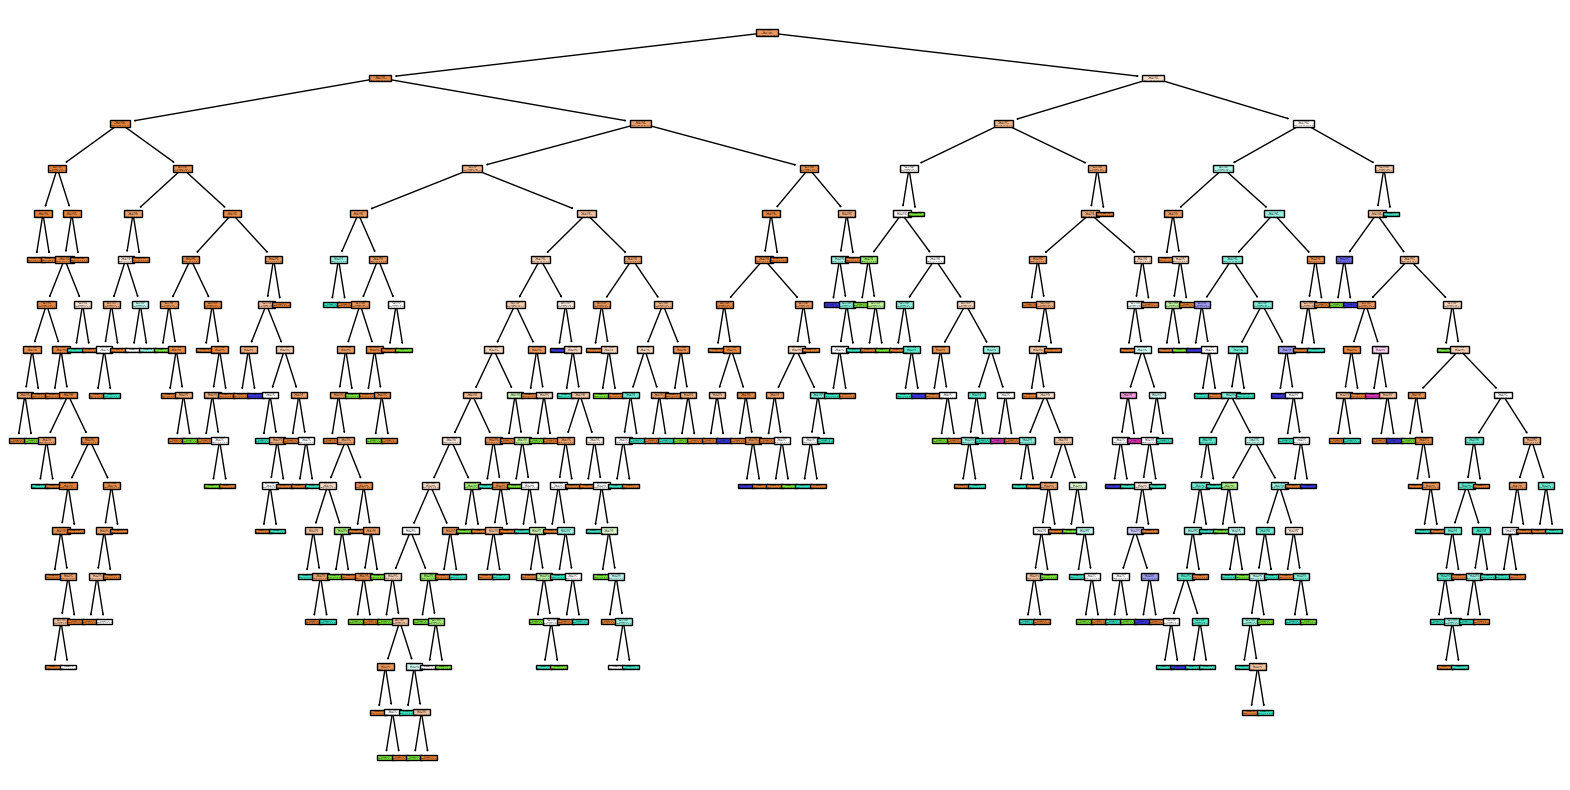

In [20]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
data = pd.read_csv('Full_data.csv')
X = data[['rating', 'user_ratings_total', ]]
y = data['price_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True)
plt.show()


In [13]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("Full_data.csv")
X = df[['rating', 'user_ratings_total', ]]
y = df['price_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
accuracy_score(y_test, y_pred)


0.8355263157894737

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression


# Load CSV file into a NumPy array
X = np.genfromtxt('Full_data.csv', delimiter=',',usecols=(0,),skip_header=1)
y=np.genfromtxt([0,1,2,3,4])

# Print the shape of the NumPy array
print(data.shape)

clf = LogisticRegression()
clf.fit(X, y)

In [ ]:
clf = LogisticRegression()
clf.fit(X, y)
new_data = np.array([[5.066, 2.016],
                     [2.288, 1.364],
                     [8.421, -0.807]])
predictions = clf.predict(new_data)
print(predictions)


In [1]:
#....ANN Regression......

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('Full_data.csv')


In [3]:

# ...
X = df[['lat', 'lng','rating', 'user_ratings_total']]

y = df['price_level']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)




In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='linear'))


In [6]:
model.compile(loss='mean_squared_error', optimizer='adam')


In [7]:
model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
57/57 [==============================] - 1s 2ms/step - loss: 0.6474
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5349
Epoch 3/100
57/57 [==============================] - 0s 2ms/step - loss: 0.5017
Epoch 4/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4859
Epoch 5/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4729
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4640
Epoch 7/100
57/57 [==============================] - 0s 3ms/step - loss: 0.4558
Epoch 8/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4494
Epoch 9/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4424
Epoch 10/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4371
Epoch 11/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4322
Epoch 12/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4293
Epoch 13/100
57/57 [=================

In [8]:
loss = model.evaluate(X_test, y_test)
print('Test loss:', loss)


15/15 [==============================] - 0s 2ms/step - loss: 0.3835
Test loss: 0.38353779911994934


In [35]:
pip install scikit-learn numpy pandas matplotlib


Note: you may need to restart the kernel to use updated packages.


In [36]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [37]:
df=pd.read_csv("Full_data.csv")
X=df[['lat','lng','rating','user_ratings_total']]
y=df['price_level']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [39]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

In [40]:
y_pred = gnb.predict(X_test)


In [41]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8099415204678363


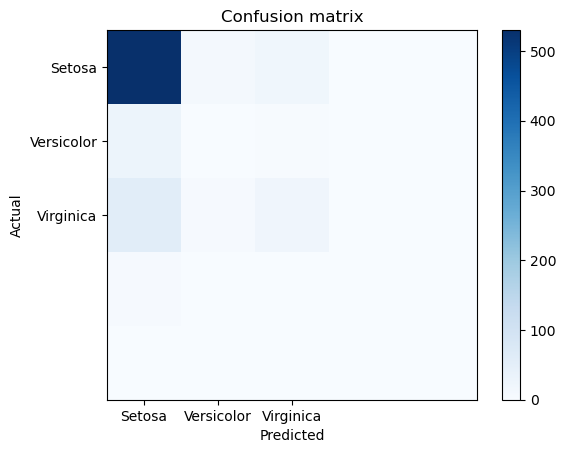

In [42]:
labels = ['Setosa', 'Versicolor', 'Virginica']
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks([0, 1, 2], labels)
plt.yticks([0, 1, 2], labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [76]:
from sklearn import svm


In [79]:
df=pd.read_csv("Full_data.csv")
X=df[['lat','lng','rating','user_ratings_total']]
y=df['price_level']

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
clf = svm.SVC(kernel='linear', C=1)
